In [63]:
import yfinance as yf
import pandas as pd
import os

In [64]:
stock= "AAP"
start_date="2021-01-01"
end_date="2024-10-15"
data= yf.download(stock,start=start_date,end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  157.899994  159.570007  155.960007  157.339996  143.820786   
2021-01-05  156.229996  158.139999  155.339996  157.169998  143.665359   
2021-01-06  157.210007  166.789993  157.210007  166.250000  151.965179   
2021-01-07  165.960007  168.800003  164.600006  167.669998  153.263168   
2021-01-08  168.309998  171.070007  168.100006  170.059998  155.447769   
...                ...         ...         ...         ...         ...   
2024-10-08   38.700001   39.230000   38.299999   38.849998   38.590305   
2024-10-09   39.020000   39.450001   38.009998   38.439999   38.183048   
2024-10-10   38.259998   38.360001   37.240002   37.400002   37.150002   
2024-10-11   37.099998   37.830002   37.040001   37.529999   37.529999   
2024-10-14   37.549999   39.500000   37.400002   39.470001   39.470001   

             Volume  
Date           

In [65]:
df=pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,157.899994,159.570007,155.960007,157.339996,143.820786,849100
2021-01-05,156.229996,158.139999,155.339996,157.169998,143.665359,619500
2021-01-06,157.210007,166.789993,157.210007,166.250000,151.965179,1584000
2021-01-07,165.960007,168.800003,164.600006,167.669998,153.263168,993200
2021-01-08,168.309998,171.070007,168.100006,170.059998,155.447769,864500


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 951 entries, 2021-01-04 to 2024-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       951 non-null    float64
 1   High       951 non-null    float64
 2   Low        951 non-null    float64
 3   Close      951 non-null    float64
 4   Adj Close  951 non-null    float64
 5   Volume     951 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 52.0 KB


In [67]:
df["date"]=pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2021-01-04,157.899994,159.570007,155.960007,157.339996,143.820786,849100,2021-01-04
2021-01-05,156.229996,158.139999,155.339996,157.169998,143.665359,619500,2021-01-05
2021-01-06,157.210007,166.789993,157.210007,166.250000,151.965179,1584000,2021-01-06
2021-01-07,165.960007,168.800003,164.600006,167.669998,153.263168,993200,2021-01-07
2021-01-08,168.309998,171.070007,168.100006,170.059998,155.447769,864500,2021-01-08


In [68]:
import plotly.graph_objects as go


In [69]:
pip install plotly


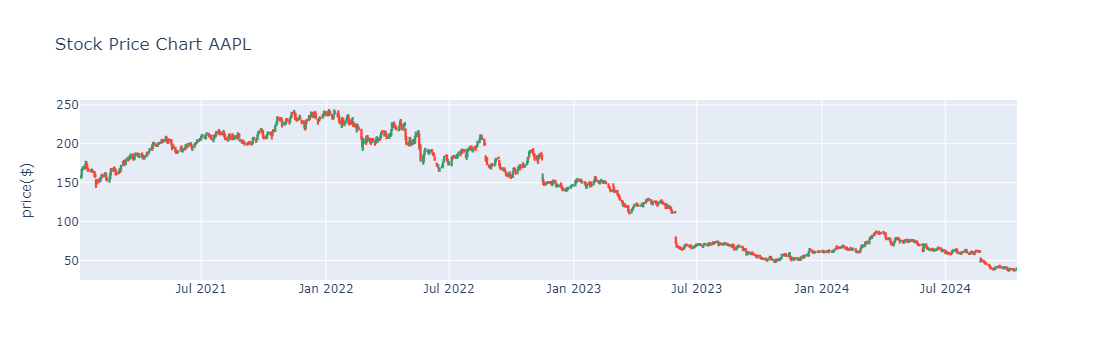

In [71]:
#USING PLOTLY ,CREATING A CANDLESTICK PATTERN OF STOCK PRICE CHART:

fig= go.Figure(data=[go.Candlestick(x=df['date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])
fig.update_layout(
    title="Stock Price Chart AAPL",
    yaxis_title="price($)",
    xaxis_rangeslider_visible=False)
fig.show()

<Axes: >

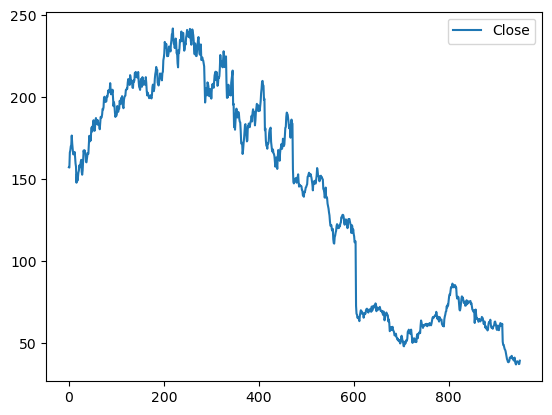

In [73]:
df.drop(['date','Volume'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.plot.line(y="Close",use_index=True)


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING SETS:

x=df[['Open','Close','High','Low','Adj Close']]
y=df['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [59]:
#BUILDING A RANDOM FOREST REGRESSION MODEL:
rf= RandomForestRegressor(n_estimators=100,random_state=42)

#TRAINING THE MODEL:
rf.fit(x_train,y_train)

#PREDICTION ON TESTING SET:
y_pred=rf.predict(x_test)

In [60]:
#EVALUATING THE MODEL USING MEAN SQUARE ERROR:
mse=mean_squared_error(y_test,y_pred)
print("Mean Square Error is:",mse)

Mean Square Error is: 0.12520556372968805


In [82]:
df.tail()

,Open,High,Low,Close,Adj Close
946,38.700001,39.230000,38.299999,38.849998,38.590305
947,39.020000,39.450001,38.009998,38.439999,38.183048
948,38.259998,38.360001,37.240002,37.400002,37.150002
949,37.099998,37.830002,37.040001,37.529999,37.529999
950,37.549999,39.500000,37.400002,39.470001,39.470001


In [77]:
#INPUT THE LAST FIVE VALUES TO PREDICT THE STOCK PRICE:
import numpy as np
new_data= np.array([[ 38.700001,39.020000,38.259998,37.099998,37.549999]])
predicted_price=rf.predict(new_data)
print("predicted stock opening price:",predicted_price)

predicted stock price: [37.9264996]


C:\Users\mabas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [81]:
new_data2= np.array([[ 38.849998,38.439999,37.400002,37.529999,39.470001]])
predicted_price=rf.predict(new_data2)
print("predicted stock closing price:",predicted_price[0])

predicted stock closing price: 38.61590000152588


C:\Users\mabas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

